In [16]:
%%html
<style>
table {float:left}
</style>

In [17]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 603713 密尔克卫

In [18]:
ticker = '603713'

In [19]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)

In [20]:
change = income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '归属于母公司所有者的净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,归属于母公司所有者的净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
92282,2019-12-31,1.960587e+08,1.2859,1.2859,35.6,36.4,48.4
92283,2018-12-31,1.321563e+08,1.0147,1.0147,38.2,35.0,57.9
92285,2017-12-31,8.369159e+07,0.7319,0.7319,37.5,35.6,49.4
92288,2016-12-31,5.602973e+07,0.5043,0.5043,49.1,54.5,9.1
92290,2015-12-31,5.135261e+07,0.4038,0.4038,NaN,NaN,NaN


In [21]:
change = incomeq[['营业收入', '归属于母公司所有者的净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '归属于母公司所有者的净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,归属于母公司所有者的净利润,营业收入,归属于母公司所有者的净利润
149724,2020-06-30,8.491761e+08,87593462.58,40.2,68.3
149725,2020-03-31,6.362376e+08,53144365.78,25.6,25.8
149726,2019-12-31,6.286856e+08,51856357.16,11.3,87.6
149727,2019-09-30,6.776460e+08,49918481.75,46.1,32.9
149728,2019-06-30,6.058101e+08,52039346.34,58.6,53.8
149729,2019-03-31,5.066565e+08,42244522.78,35.7,27.5
149730,2018-12-31,5.646342e+08,27639567.67,53.9,15.7
149731,2018-09-30,4.637453e+08,37555540.43,38.1,74.2
149732,2018-06-30,3.820383e+08,33830079.76,18.5,41.7
149733,2018-03-31,3.734880e+08,33131109.31,40.3,130.7


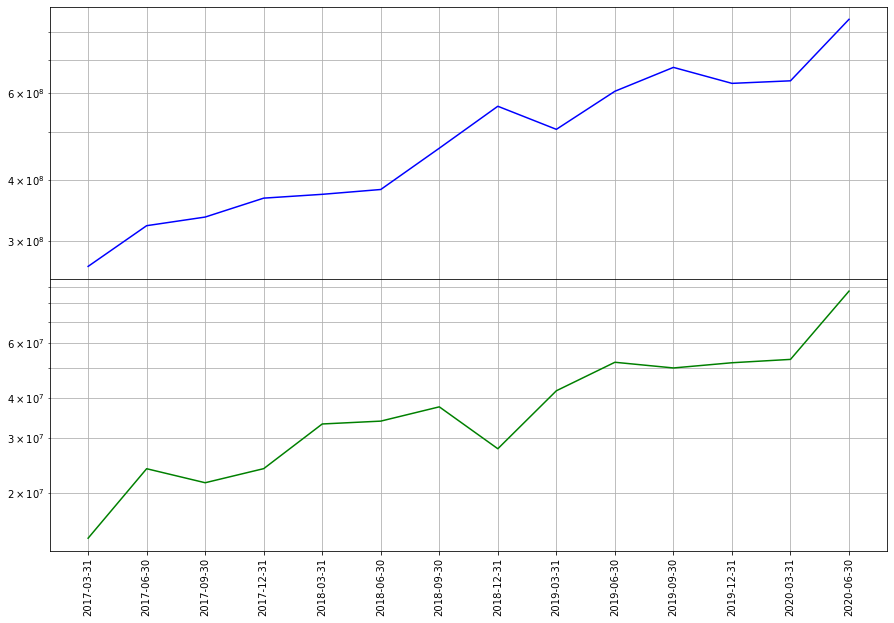

In [22]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [23]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,18.2,8.1
2018-12-31,18.3,7.4
2017-12-31,18.6,6.5
2016-12-31,19.5,6.0
2015-12-31,23.7,8.5


In [24]:
df = data.get_market(ticker)
df['前复权'] = df['收盘价'] * df['累积前复权因子']
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价           累积前复权因子              滚动市盈率  \
            min        max    min     max       min       max      min   
交易日期                                                                     
2018 2018-07-13 2018-12-28  16.23   52.86  0.994392  0.994392  22.0148   
2019 2019-01-02 2019-12-31  27.63   47.95  0.994392  0.997889  30.2885   
2020 2020-01-02 2020-10-19  35.08  158.95  0.997889  1.000000  31.5882   

                      前复权              
           max        min         max  
交易日期                                   
2018   71.7008  16.138986   52.563573  
2019   55.3218  27.475057   47.681107  
2020  101.4192  35.005941  158.950000